# **Цель и описание проекта**

В документе предоставлены данные по одному из проектов для когорт, установивших игру с 21.09.23 по 28.09.23:


### **Пояснение к таблицe:**
#### Лист *ad revenue* (данные по рекламному заработку):
- *Install_date* — дата установки игры пользователем
- *Event_date* — дата совершения события
- *Event_revenue* — рекламный заработок
- *Platform* — платформа
- *User_id* — уникальный идентификатор пользователя

#### Лист *installs data* (данные по количеству инсталлов):
- *Install_date* — дата
- *installs* — количество инсталлов
- *Platform* — платформа

# Цели
1. Провести исследовательский анализ данных (EDA) для выявления общих закономерностей и распределений.
2. Рассчитать ключевые метрики для когорт:
   - **DAU (Daily Active Users)** — ежедневно активные пользователи.
   - **Retention (Коэффициент удержания)** — процент пользователей, продолжающих использовать приложение.
   - **ARPU (Average Revenue Per User)** — средняя выручка на одного пользователя.
   - **Revenue (выручка)** и **Cumulative Revenue (накопительная выручка)**.
   - **Revenue Growth Rate (Коэффициент роста выручки)**.
3. Проверить статистические гипотезы о влиянии размеров когорт и активности пользователей на выручку.
4. Построить прогноз удержания пользователей (Retention) и роста выручки (Revenue Growth Rate) за первый месяц.

---

# План выполнения задач

## 1. Исследовательский анализ данных (EDA)
- Импорт данных с листов *ad revenue* и *installs data*.
- Проверка и обработка пропусков, анализ типов данных.
- Исследование распределений ключевых переменных (выручка, активные пользователи, размеры когорт).
- Выявление возможных аномалий и выбросов.

## 2. Расчёт, анализ и визуализация ключевых метрик по когортам

### DAU (Daily Active Users)
- Подсчитайте количество уникальных пользователей (User_id), активных каждый день.
- Визуализируйте динамику DAU по когортам и платформам.

### Retention Rate (Коэффициент удержания)
- Рассчитайте процент пользователей, активных в N-й день после установки.
- Постройте тепловую таблицу удержания (*cohort retention heatmap*) и линейный график по когортам.

### Revenue (Выручка)
- Рассчитать суммарную выручку по дням для каждой когорты.
- Построить тепловую таблицу и график распределения выручки по когортам.

### Cumulative Revenue (Накопительная выручка)
- Рассчитать кумулятивную выручку.
- Построить график роста накопительной выручки для когорт.

### Revenue Growth Rate (Коэффициент роста выручки)
- Рассчитать прирост выручки по дням для каждой когорты.
- Построить график темпов роста по когортам.

### ARPU (Average Revenue Per User)
- Рассчитайте среднюю выручку на пользователя.
- Постройте графики ARPU по когортам и платформам.

## 3. Проверка гипотез

- **Гипотеза 1**: Выручка больше зависит от размера когорт, чем от активности единичных пользователей.
  - Корреляционный анализ между размером когорт, Retention Rate и выручкой.
  - Регрессионный анализ для оценки вклада размеров когорт и активности.

- **Гипотеза 2**: Принцип Парето (80/20) соблюдается: 20% пользователей генерируют 80% выручки.
  - Проверьте долю выручки, генерируемую топ-20% пользователей.

- **Гипотеза 3**: Retention Rate различается между Android и iOS.
  - Используйте тест Манна-Уитни или t-тест для сравнения.

## 4. Прогнозирование удержания и роста выручки

- **Прогноз удержания пользователей (Retention)**:
  - Постройте модель удержания для прогнозирования Retention Rate до 30-го дня.
  - Постройте график удержания для когорт за первый месяц.

- **Прогноз роста выручки (Revenue Growth Rate)**:
  - Используйте данные о выручке за первые несколько дней для построения прогнозной модели.
  - Рассчитайте, во сколько раз увеличится доход 1-го и 3-го дня по сравнению с 30-м днём.
  - Постройте график роста выручки за первый месяц.

#### **Сбор, анализ и предобработка данных**

In [11]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date

In [12]:
# Чтение всех листов из Excel-файла
file_path = r'/content/Ad_revenue.xlsx'

# Чтение данных с разных листов
ad_revenue = pd.read_excel(file_path, sheet_name='ad revenue')
installs_data = pd.read_excel(file_path, sheet_name='installs data')

In [13]:
# Проверка на наличие пустых значений в ad_revenue
print("Пустые значения в ad_revenue:")
print(ad_revenue.isnull().sum())

print("Пустые значения в installs_data:")
print(installs_data.isnull().sum())

Пустые значения в ad_revenue:
install_date       0
event_date         0
event_revenue    911
platform           0
user_id            0
dtype: int64
Пустые значения в installs_data:
install_date    0
installs        0
platform        0
dtype: int64


In [14]:
# Расчёт процента пропущенных значений в столбце event_revenue
missing_percentage_event_revenue = ad_revenue['event_revenue'].isnull().sum() / len(ad_revenue) * 100
print(f"Процент пропущенных значений в столбце event_revenue: {missing_percentage_event_revenue:.2f}%")

Процент пропущенных значений в столбце event_revenue: 1.16%


Процент пропущенных данных (1.16%) относительно мал, и их заполнение нулями не должно существенно повлиять на общую статистику. Пропущенные значения могут означать, что в эти моменты не было активности, связанной с доходом от рекламы, и поэтому их логично интерпретировать как нулевой доход. Заполнение пропусков нулями позволит избежать проблем при вычислениях метрик (ARPU, DAU и т.д.), так как модели и методы анализа не смогут работать с пропущенными значениями.

In [15]:
# Заполнение пропусков нулями
ad_revenue = ad_revenue.fillna(0)

In [16]:
print(ad_revenue['event_revenue'].describe())

count    78723.000000
mean         0.110372
std          0.192495
min          0.000000
25%          0.024800
50%          0.051240
75%          0.118548
max          7.911244
Name: event_revenue, dtype: float64


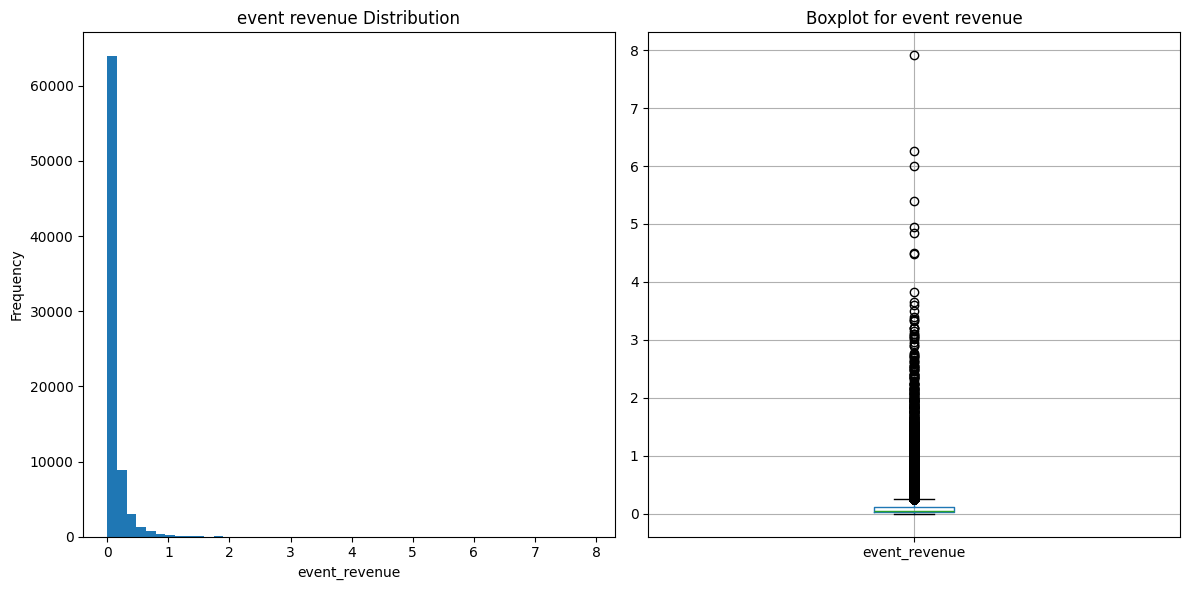

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # figsize регулирует размер графиков

# Построение гистограммы event_revenue
ad_revenue['event_revenue'].plot(kind='hist', bins=50, ax=axs[0], title='event revenue Distribution')
axs[0].set_xlabel('event_revenue')
axs[0].set_ylabel('Frequency')

# Построение Boxplot event_revenue
ad_revenue.boxplot(column='event_revenue', ax=axs[1])
axs[1].set_title('Boxplot for event revenue')

# Отображение графиков
plt.tight_layout()
plt.show()

Рассмотрим как распределено *event_revenue* на разных платформах

In [18]:
# Фильтрация данных по платформам
android_data = ad_revenue[ad_revenue['platform'] == 'android']
ios_data = ad_revenue[ad_revenue['platform'] == 'ios']

In [21]:
print("Описательная статистика для Android:")
print(android_data['event_revenue'].describe())

# Описательная статистика для iOS
print("\nОписательная статистика для iOS:")
print(ios_data['event_revenue'].describe())

Описательная статистика для Android:
count    72360.000000
mean         0.107987
std          0.191550
min          0.000000
25%          0.024210
50%          0.049446
75%          0.113870
max          7.911244
Name: event_revenue, dtype: float64

Описательная статистика для iOS:
count    6363.000000
mean        0.137504
std         0.200965
min         0.000000
25%         0.034426
50%         0.073950
75%         0.165450
max         3.603033
Name: event_revenue, dtype: float64


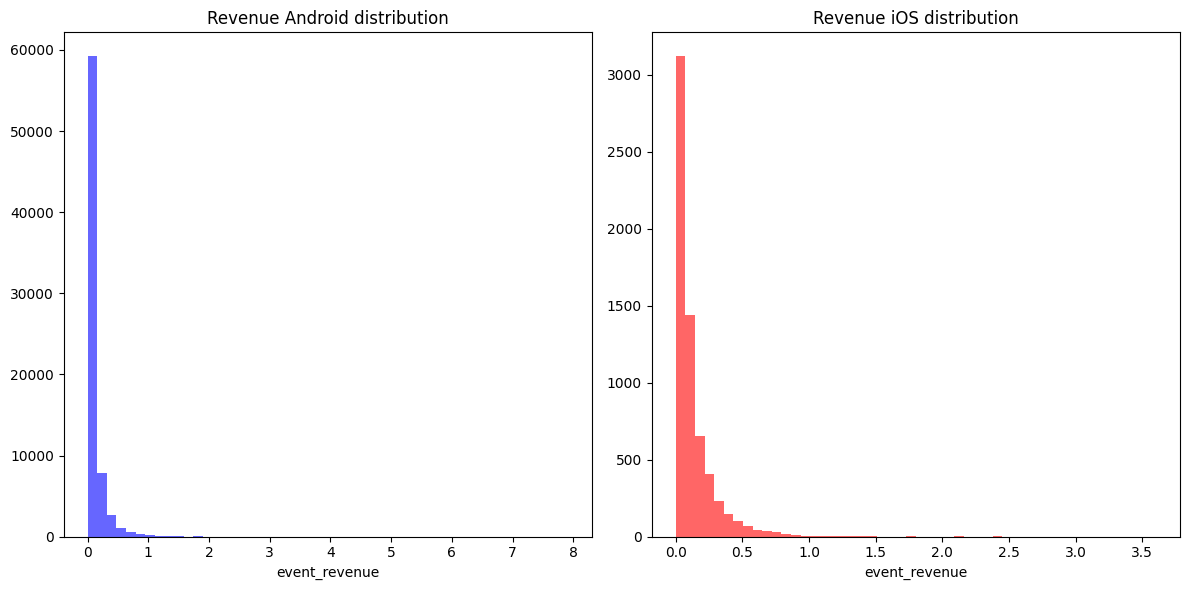

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма для Android
axs[0].hist(android_data['event_revenue'], bins=50, alpha=0.6, color='blue')
axs[0].set_title('Revenue Android distribution')
axs[0].set_xlabel('event_revenue')

# Гистограмма для iOS
axs[1].hist(ios_data['event_revenue'], bins=50, alpha=0.6, color='red')
axs[1].set_title('Revenue iOS distribution')
axs[1].set_xlabel('event_revenue')

# Настройка отображения
plt.tight_layout()
plt.show()

<ipython-input-23-7bf553936d2c>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([android_data['event_revenue'], ios_data['event_revenue']], labels=['Android', 'iOS'])


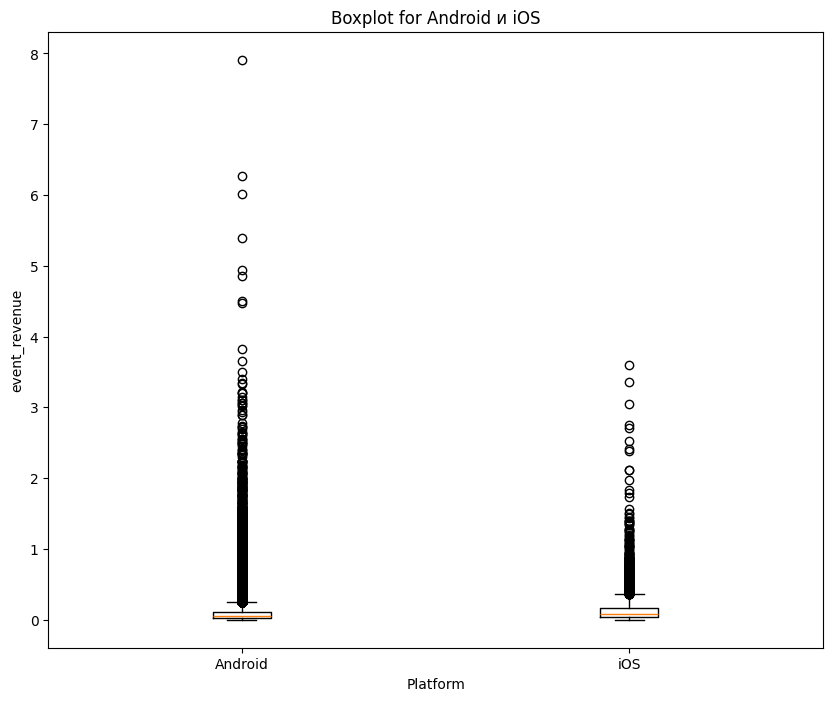

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

# Boxplot для Android и iOS
ax.boxplot([android_data['event_revenue'], ios_data['event_revenue']], labels=['Android', 'iOS'])

# Настройка графика
ax.set_title('Boxplot for Android и iOS')
ax.set_ylabel('event_revenue')
ax.set_xlabel('Platform')

# Отображение графика
plt.show()

Распределение суммы event_revenue по пользователям:

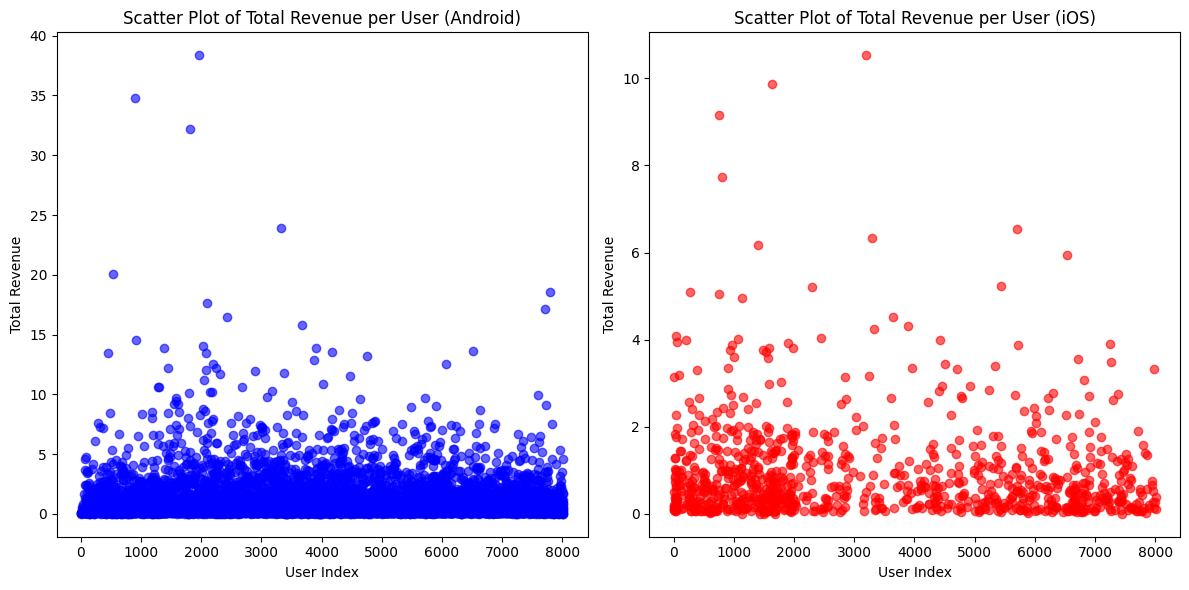

In [24]:
# Grouping data by user_id and platform, summing the total revenue for each user
grouped_data_platform = ad_revenue.groupby(['user_id', 'platform']).agg(total_revenue=('event_revenue', 'sum')).reset_index()

# Creating subplots for Android and iOS
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Android
android_data = grouped_data_platform[grouped_data_platform['platform'] == 'android']
axs[0].scatter(android_data.index, android_data['total_revenue'], color='blue', alpha=0.6)
axs[0].set_title('Scatter Plot of Total Revenue per User (Android)')
axs[0].set_xlabel('User Index')
axs[0].set_ylabel('Total Revenue')

# Plot for iOS
ios_data = grouped_data_platform[grouped_data_platform['platform'] == 'ios']
axs[1].scatter(ios_data.index, ios_data['total_revenue'], color='red', alpha=0.6)
axs[1].set_title('Scatter Plot of Total Revenue per User (iOS)')
axs[1].set_xlabel('User Index')
axs[1].set_ylabel('Total Revenue')

# Display the plots
plt.tight_layout()
plt.show()

#### **Выводы:**

#### **Статистические различия:**
- **Среднее значение выручки** на iOS выше, чем на Android, несмотря на наличие более крупных выбросов на Android. Это может означать, что пользователи iOS в целом приносят больше выручки, но без столь резких скачков, как на Android.
- **Стандартное отклонение (std)** выше на Android, что также указывает на большую изменчивость данных.

#### **Распределение event_revenue:**
- На гистограммах видно, что распределение выручки для обеих платформ имеет сильный сдвиг к нулю, с редкими случаями высоких значений.
- Выбросы более выражены для *Android*, что может говорить о том, что на этой платформе есть пользователи, которые генерируют высокие суммы выручки.
На *iOS* такие пользователи также есть, но в меньшем количестве, и их выручка не достигает таких высоких значений.

#### **event_revenue по пользователям:**
На scatter-плотах по пользователям видно, что конкретные пользователи, особенно на платформе Android, могут генерировать большое суммарное количество выручки, что подтверждает гипотезу о том, что некоторые пользователи более активны или вовлечены, что приводит к значительным выбросам в их общей выручке.
Эти пользователи могут влиять на общие метрики, такие как ARPU.

Таким образом, можно сделать вывод, что на обеих платформах существуют пользователи с высокой активностью, но на Android эти выбросы выражены сильнее.

#### **Расчёт метрик**:

Объединение данных из двух листов по полю *Install_date* и *Platform*:

In [25]:
ad_revenue['event_date'] = pd.to_datetime(ad_revenue['event_date']).dt.date
ad_revenue['install_date'] = pd.to_datetime(ad_revenue['install_date']).dt.date
installs_data['install_date'] = pd.to_datetime(installs_data['install_date']).dt.date

In [26]:
# Создаем таблицу cohort_data с группировкой по install_date и platform
cohort_data = installs_data.groupby(['install_date', 'platform']).agg({
    'installs': 'sum'  # Суммируем количество инсталлов
}).reset_index()
cohort_data.columns = ['install_date', 'platform', 'cohort_size']

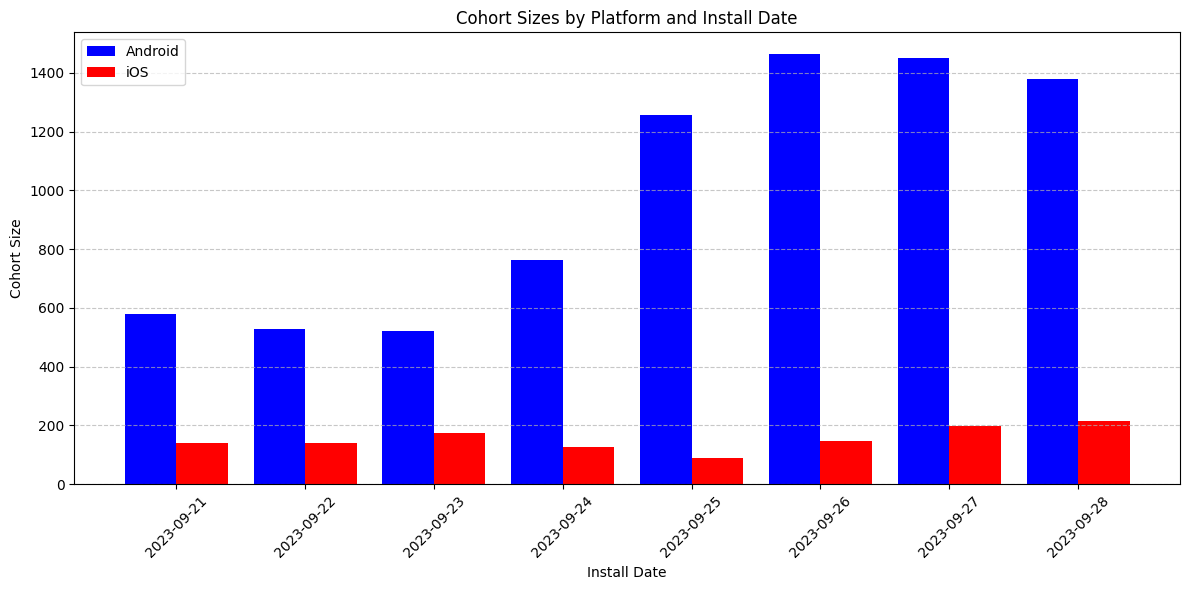

In [27]:
# Данные из cohort_data
install_dates = cohort_data['install_date'].unique()  # Уникальные даты установки
android_sizes = cohort_data[cohort_data['platform'] == 'android']['cohort_size'].values
ios_sizes = cohort_data[cohort_data['platform'] == 'ios']['cohort_size'].values

# Определяем положение столбиков
x = np.arange(len(install_dates))  # Позиции для каждой даты
width = 0.4  # Ширина столбиков

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, android_sizes, width, label='Android', color='blue')
plt.bar(x + width/2, ios_sizes, width, label='iOS', color='red')

# Настройки графика
plt.xlabel('Install Date')
plt.ylabel('Cohort Size')
plt.title('Cohort Sizes by Platform and Install Date')
plt.xticks(ticks=x, labels=install_dates, rotation=45)  # Подписи оси X
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

Когортные группы на Android значительно больше, чем на iOS. Например, для 25 сентября на Android 1258 установок, тогда как на iOS — всего 91. Это указывает на то, что пользователи Android более многочисленны или приложение более популярно на этой платформе.

Описание расчета метрик:
1. Группировка данных:
Данные группируются по install_date, event_date и platform.

2. Для каждой группы рассчитываются:
- *DAU* (Daily Active Users): количество уникальных пользователей ('user_id': 'nunique').
- *Event Revenue*: сумма выручки за день ('event_revenue': 'sum').
- Дни с момента установки (*days_since_install*): Рассчитывается разница между event_date и install_date для каждого события, показывая, сколько дней прошло с момента установки.

3. Присоединение размера когорты (*cohort_size*):

К каждому дню и платформе добавляется размер когорты (количество пользователей, установивших приложение в install_date).

4. Далее расчитываются рассчитываются:
- *ARPU* (Average Revenue Per User): Средняя выручка на активного пользователя в день рассчитывается как:

- *Retention Rate*: Процент пользователей, которые остаются активными, рассчитывается как:
- Кумулятивная выручка (*cumulative_revenue*): Считается накопительная сумма выручки по дням для каждой когорты.
- Коэффициент роста выручки (*revenue_growth*): Накопительная выручка делится на первую дневную выручку (значение на 1-й день) для вычисления относительного роста.

5. Разделение по платформам:

Данные разделяются на две части: для Android и iOS (platform == 'android' или 'ios').

In [28]:
# Группируем данные по когортам (дата установки) и дням активности (event_date)
daily_data = ad_revenue.groupby(['install_date', 'event_date', 'platform']).agg({
    'user_id': 'nunique',  # Считаем количество уникальных активных пользователей (DAU)
    'event_revenue': 'sum'  # Считаем выручку за день
}).reset_index()

daily_data.columns = ['install_date', 'event_date', 'platform', 'DAU', 'event_revenue']

# Рассчитываем количество дней с момента установки
daily_data['days_since_install'] = (pd.to_datetime(daily_data['event_date']) - pd.to_datetime(daily_data['install_date'])).dt.days

# Присоединяем данные по размеру когорты (cohort_size)
daily_data = daily_data.merge(cohort_data[['install_date', 'platform', 'cohort_size']], on=['install_date', 'platform'], how='left')

# ARPU (средняя выручка на активного пользователя) в день
daily_data['ARPU'] = daily_data['event_revenue'] / daily_data['DAU']

# Рассчитываем Retention Rate как процент активных пользователей (DAU) к общему количеству пользователей (размеру когорты) на день установки
daily_data['retention_rate'] = (daily_data['DAU'] / daily_data['cohort_size']) * 100

# Рассчитываем кумулятивное значение выручки для каждой когорты
daily_data['cumulative_revenue'] = daily_data.groupby(['install_date', 'platform'])['event_revenue'].cumsum()

# Выбираем первую выручку за первый день для каждой когорты
initial_revenue = daily_data.groupby(['install_date', 'platform'])['event_revenue'].transform('first')

# Рассчитываем коэффициент роста выручки выручке
daily_data['revenue_growth'] = (daily_data['cumulative_revenue'] / initial_revenue)

# Разделяем данные на платформы
daily_data_android = daily_data[daily_data['platform'] == 'android']
daily_data_ios = daily_data[daily_data['platform'] == 'ios']

#### **Анализ среднего дохода на пользователя (ARPU, Avarage Revenue Per User)**

In [29]:
# Подсчитаем количество уникальных пользователей и выручку по платформам
platform_stats = ad_revenue.groupby('platform').agg({
    'user_id': 'nunique',  # Уникальные пользователи
    'event_revenue': 'sum'  # Суммарная выручка
}).reset_index()

# Рассчитаем общий ARPU за весь период
platform_stats['ARPU'] = platform_stats['event_revenue'] / platform_stats['user_id']

# Выведем результат
print(platform_stats)

  platform  user_id  event_revenue      ARPU
0  android     7085    7813.908686  1.102881
1      ios      933     874.936242  0.937767


In [30]:
# Рассчитываем среднее значение ARPU по дням и кагортам
average_arpu_android = daily_data_android['ARPU'].mean()
average_arpu_ios = daily_data_ios['ARPU'].mean()

# Выводим результат
print(f"Средний ARPU для Android: {average_arpu_android:.2f}")
print(f"Средний ARPU для IOS: {average_arpu_ios:.2f}")

Средний ARPU для Android: 0.48
Средний ARPU для IOS: 0.38


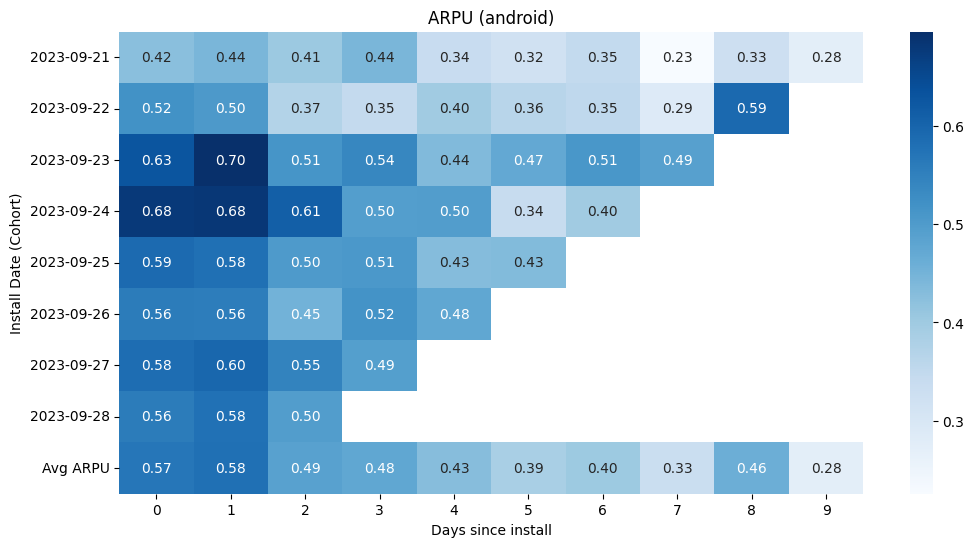

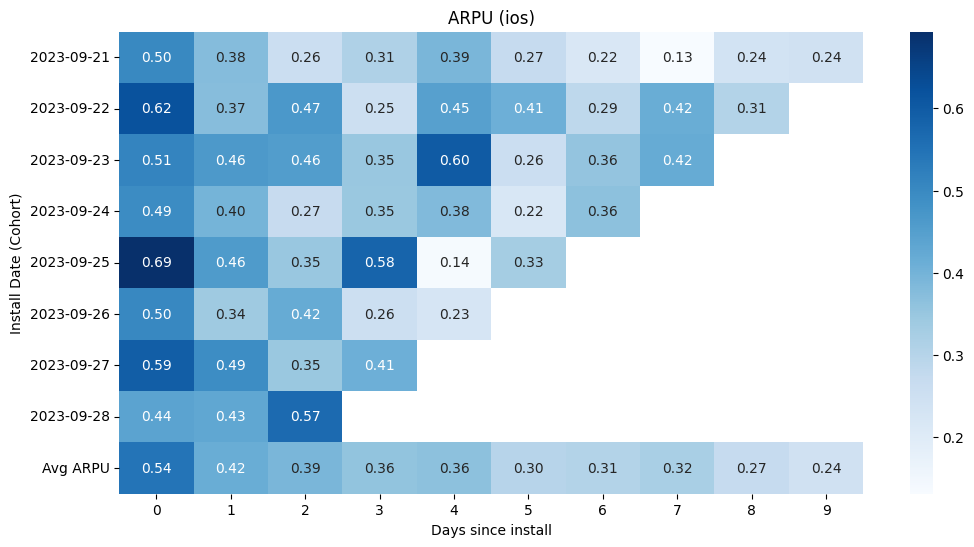

In [31]:
# Рассчитываем среднее значение ARPU по каждому дню (days_since_install)
mean_ARPU_android = daily_data_android.groupby('days_since_install')['ARPU'].mean()
ARPU_pivot_android = daily_data_android.pivot(index='install_date', columns='days_since_install', values='ARPU')
ARPU_pivot_android.loc['Avg ARPU'] = mean_ARPU_android

# Визуализация ARPU
plt.figure(figsize=(12, 6))
sns.heatmap(ARPU_pivot_android, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('ARPU (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

# Аналогичный код для iOS
mean_ARPU_ios = daily_data_ios.groupby('days_since_install')['ARPU'].mean()
ARPU_pivot_ios = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='ARPU')
ARPU_pivot_ios.loc['Avg ARPU'] = mean_ARPU_ios

plt.figure(figsize=(12, 6))
sns.heatmap(ARPU_pivot_ios, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('ARPU (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

 На основании предоставленных метрик ARPU можно сделать следующие выводы:

1. Средняя выручка на пользователя за весь период (ARPU):
- Android: Средний ARPU составляет 1.102881 за весь период. Это означает, что каждый пользователь Android в среднем приносит чуть больше одной единицы выручки на протяжении всего времени использования приложения.
- iOS: Средний ARPU составляет 0.937767. Хотя это значение ниже, чем у Android, оно довольно близко к единице, что указывает на стабильную, но меньшую выручку на пользователя по сравнению с Android.
2. Средняя выручка на пользователя в день по когортам:
- Android: Средний дневной ARPU составляет 0.48. Это может свидетельствовать о более активных пользователях на платформе Android, которые приносят значительную часть выручки за короткий период времени.
- iOS: Средний дневной ARPU составляет 0.38, что несколько ниже, чем на Android. Это подтверждает гипотезу о том, что пользователи iOS приносят меньше выручки в день, но при этом более стабильно в течение всего периода использования приложения.

Разница между общим ARPU и средним ARPU по дням может объясняться как наличием пользователей с высокой выручкой, так и тем, что некоторые пользователи совершают регулярные действия в приложении на протяжении длительного времени, что приводит к накоплению выручки. Выбросы и долгосрочная активность являются ключевыми факторами, которые увеличивают общий ARPU по сравнению с дневным.

#### **Анализ активности пользователей (DAU, Daily Active Users)**

Следующий график представляет анализ активности пользователей (DAU, Daily Active Users) на платформах Android и iOS.
Он показывает, сколько пользователей, установивших приложение в разные дни (когорты), были активны в каждый день после установки.

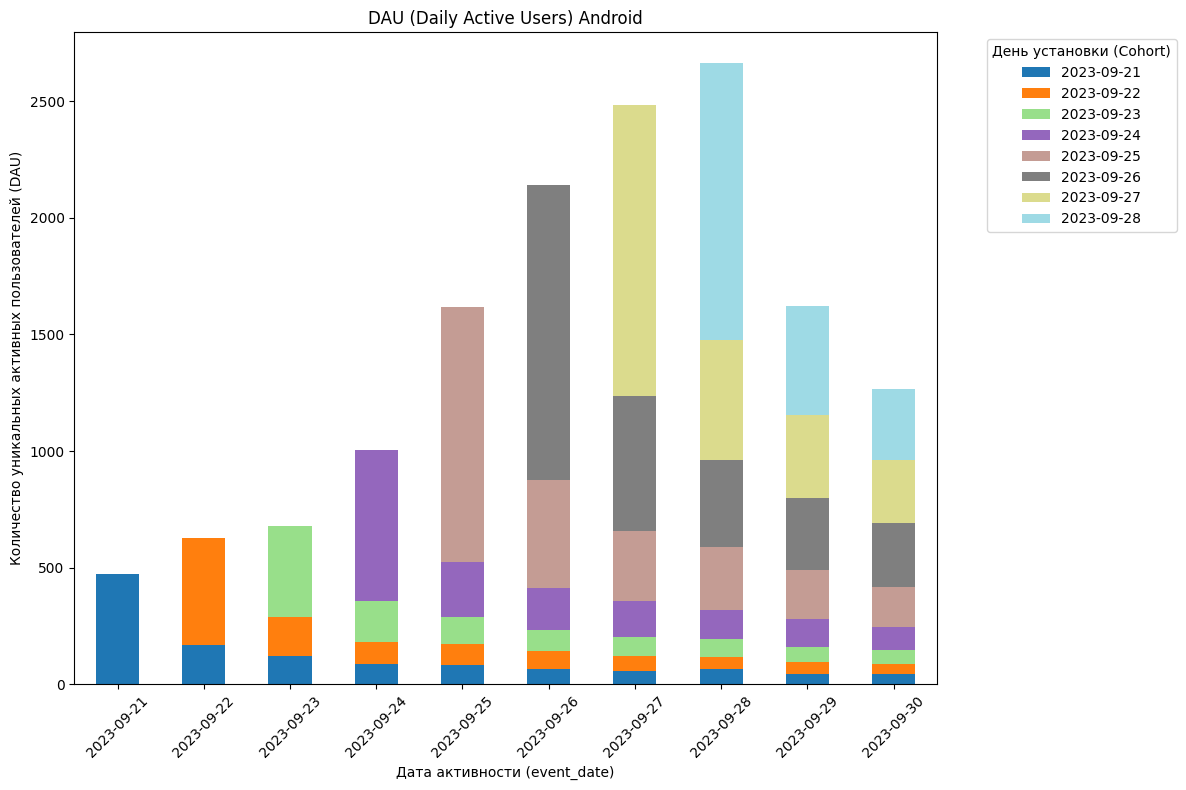

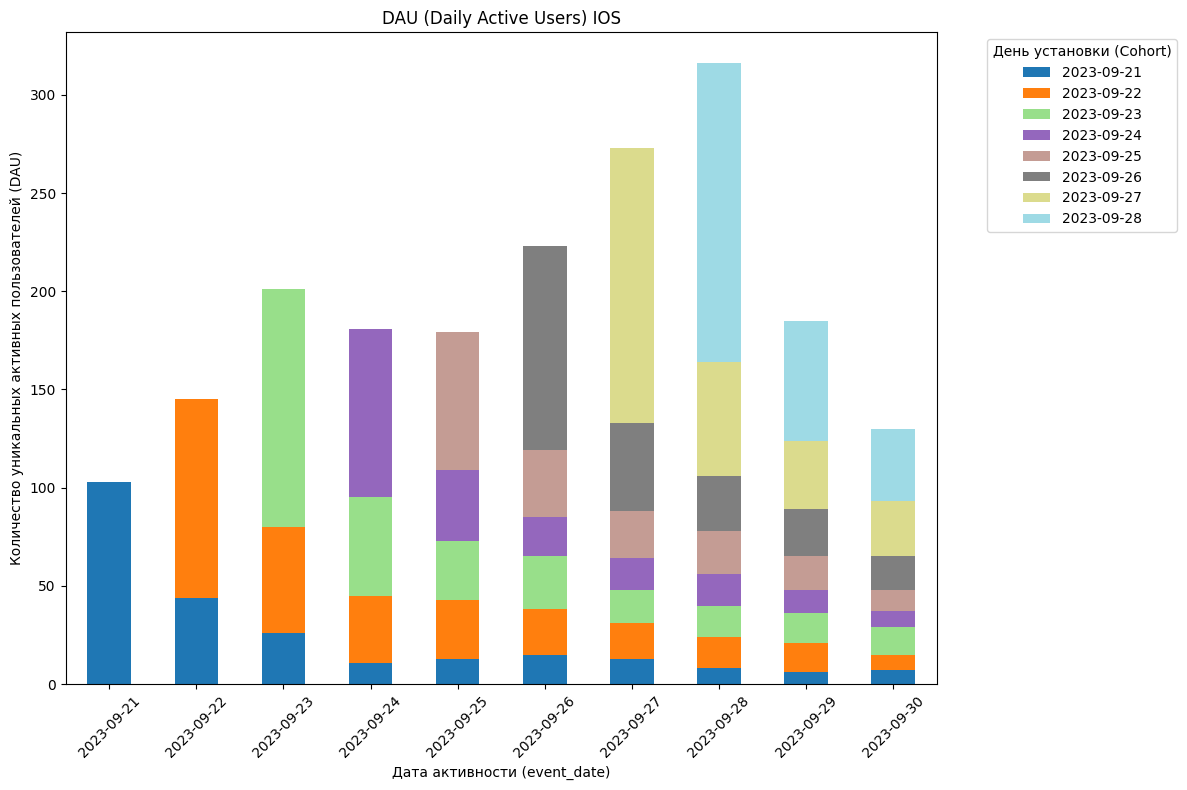

In [32]:
# Строим сводную таблицу активных пользователей для stacked bar chart по дням
pivot_dau = daily_data_android.pivot_table(values='DAU', index='event_date', columns='install_date', aggfunc='sum', fill_value=0)

# android
pivot_dau.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('DAU (Daily Active Users) Android')
plt.xlabel('Дата активности (event_date)')
plt.ylabel('Количество уникальных активных пользователей (DAU)')
plt.xticks(rotation=45)
plt.legend(title='День установки (Cohort)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ios
pivot_dau = daily_data_ios.pivot_table(values='DAU', index='event_date', columns='install_date', aggfunc='sum', fill_value=0)

pivot_dau.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('DAU (Daily Active Users) IOS')
plt.xlabel('Дата активности (event_date)')
plt.ylabel('Количество уникальных активных пользователей (DAU)')
plt.xticks(rotation=45)
plt.legend(title='День установки (Cohort)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Android показывает более высокую активность пользователей, с пиковыми значениями DAU, достигающими более 2500 уникальных активных пользователей в день.

iOS имеет более низкие показатели активности, с максимумом около 300 пользователей в день.

В целом, можно предположить, что на Android пользователи более активно возвращаются в приложение после установки, что может говорить о лучшей вовлеченности или более эффективной рекламе на этой платформе.

#### **Удержание пользователей (Retention)**
Эти таблицы и графики показывают процент удержания пользователей (Retention) для каждой когорты (дата установки) на Android и iOS,
начиная с 0-го дня после установки и до 9-го дня.

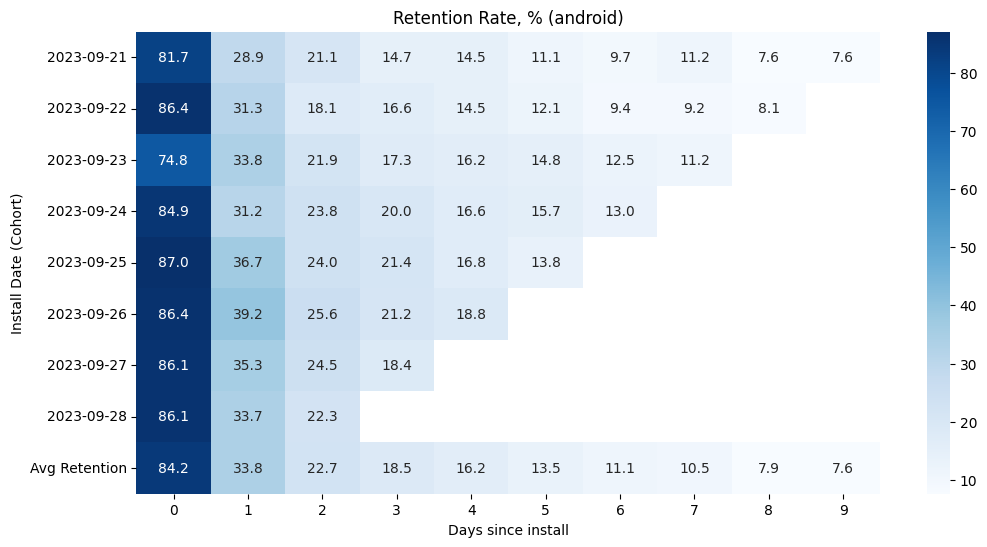

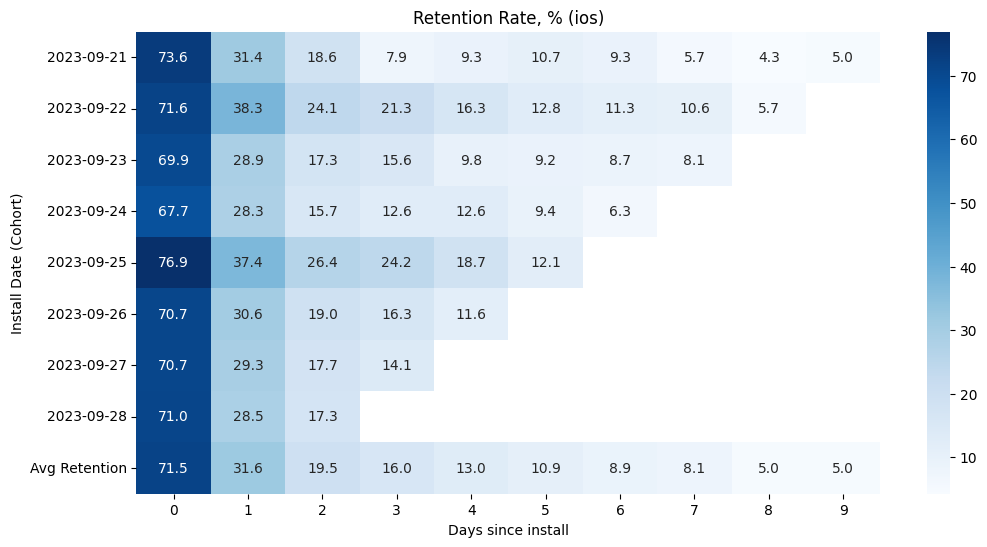

In [33]:
# Рассчитываем среднее значение retention по каждому дню (days_since_install)
mean_retention_android = daily_data_android.groupby('days_since_install')['retention_rate'].mean()
retention_pivot_android = daily_data_android.pivot(index='install_date', columns='days_since_install', values='retention_rate')
retention_pivot_android.loc['Avg Retention'] = mean_retention_android

# Визуализация Retention Rate
plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot_android, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title('Retention Rate, % (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

# Аналогичный код для iOS
mean_retention_ios = daily_data_ios.groupby('days_since_install')['retention_rate'].mean()
retention_pivot_ios = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='retention_rate')
retention_pivot_ios.loc['Avg Retention'] = mean_retention_ios

plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot_ios, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title('Retention Rate, % (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

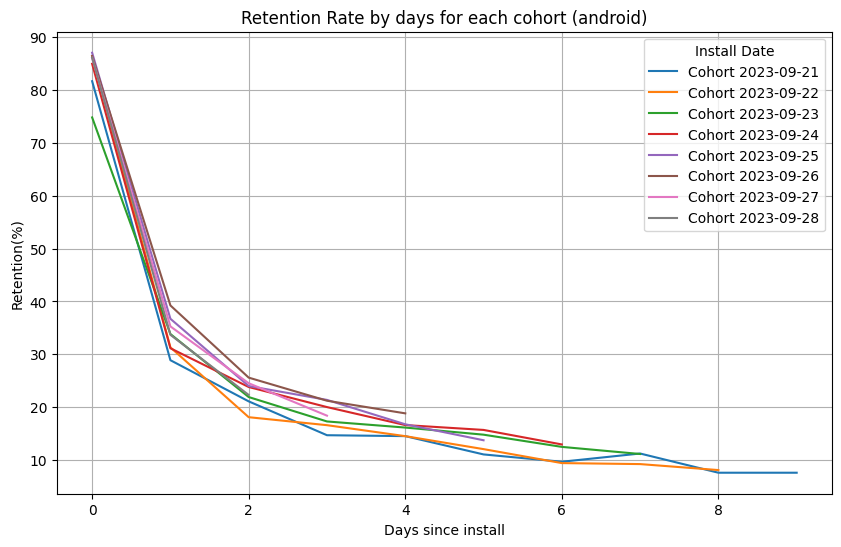

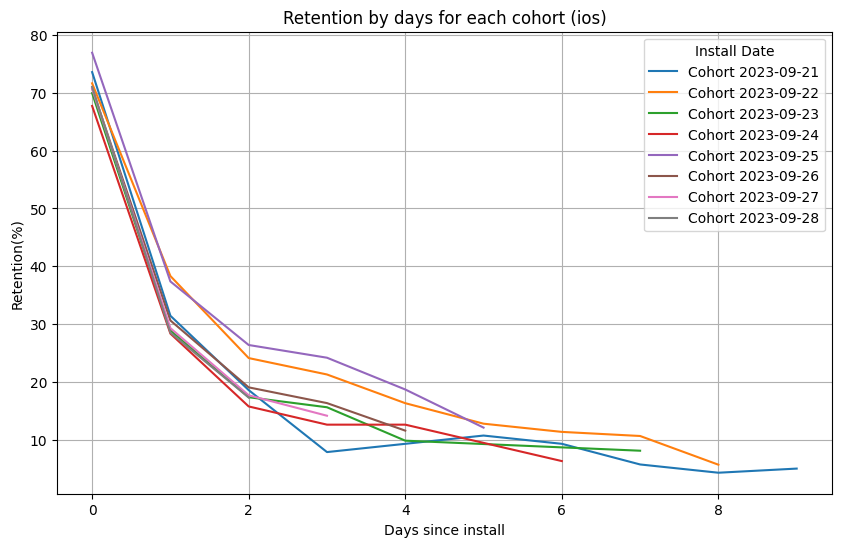

In [34]:
# Строим график Retention для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['retention_rate'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Retention Rate by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Retention(%)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график Retention для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['retention_rate'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Retention by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Retention(%)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Доход по когортам (Revenue)**

Это таблицы показывают ежедневный доход (Revenue), получаемый от каждой когорты пользователей за каждый день после установки.
Каждая строка в таблице соответствует дате установки (кохорта), а каждый столбец — это день с момента установки (Days since install).

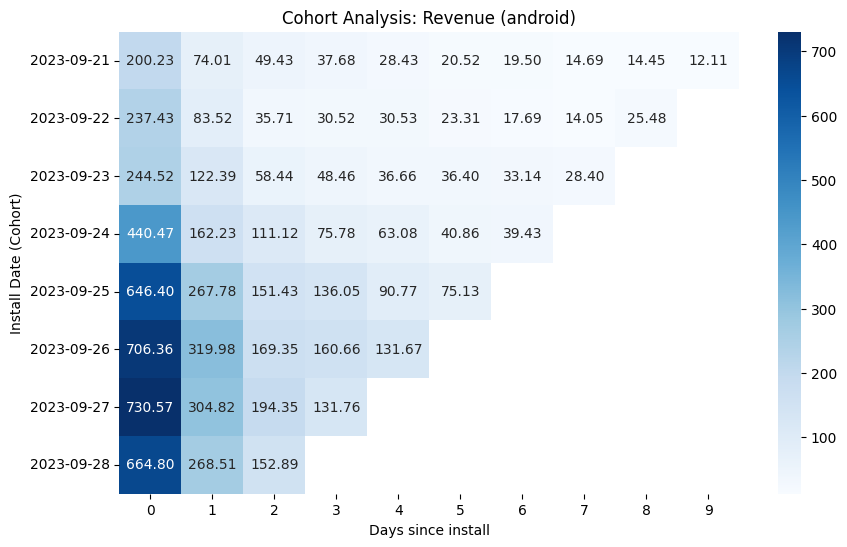

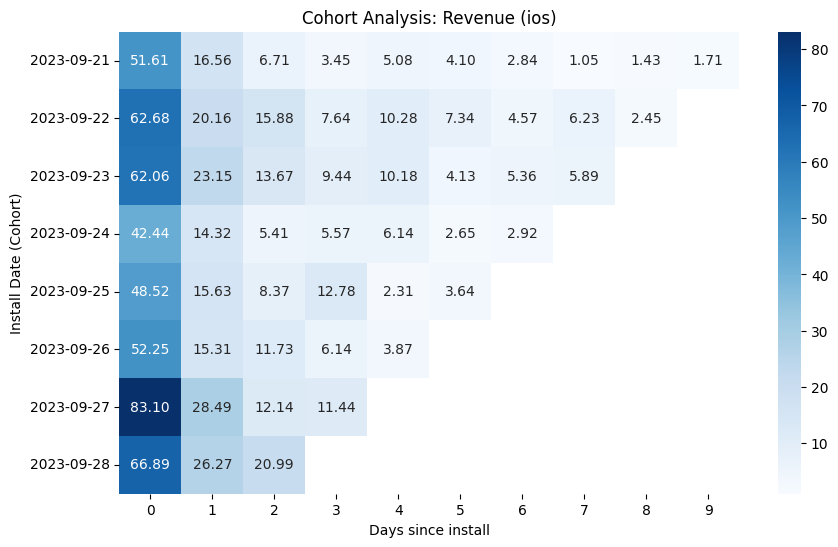

In [35]:
revenue_table = daily_data_android.pivot(index='install_date', columns='days_since_install', values='event_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

revenue_table = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='event_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

#### **Кумулятивный доход по кагортам (Cumulative Revenue)**


Эти таблицы показывают накопленный (кумулятивный) доход от каждой когорты за каждый день после установки.

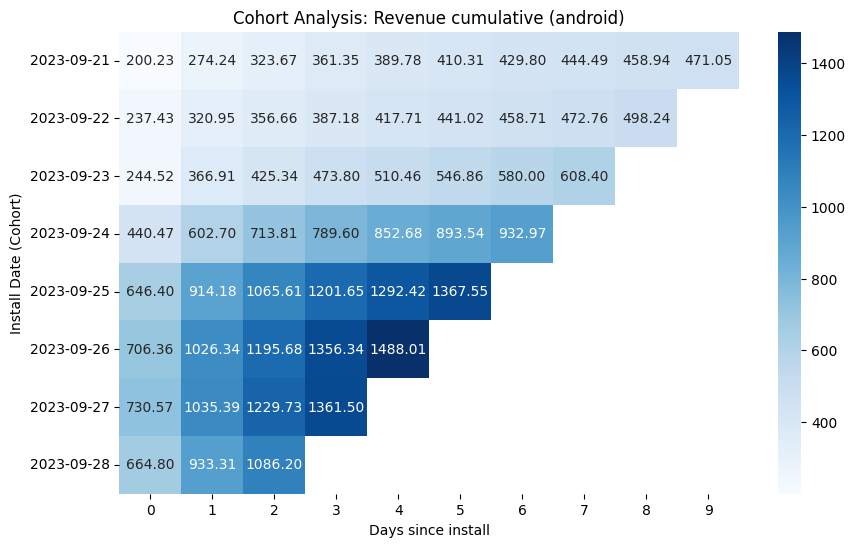

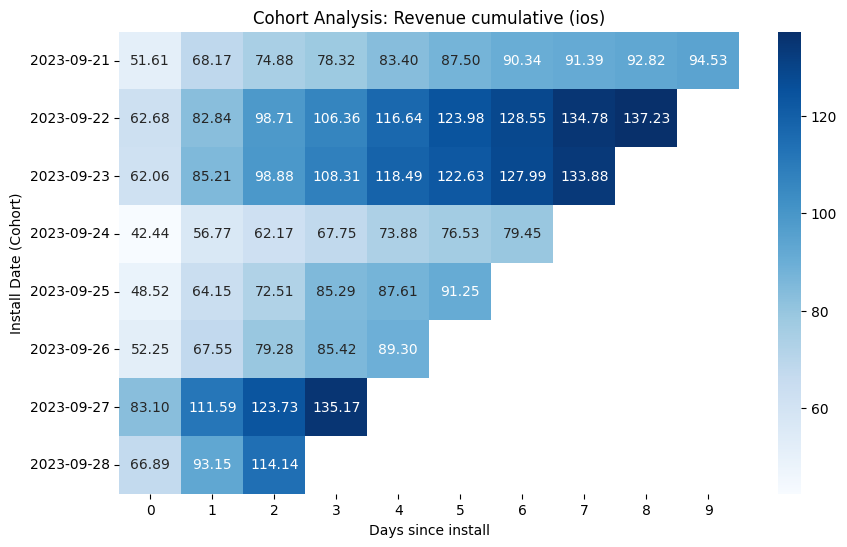

In [36]:
revenue_table = daily_data_android.pivot(index='install_date', columns='days_since_install', values='cumulative_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue cumulative (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

revenue_table = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='cumulative_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue cumulative (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

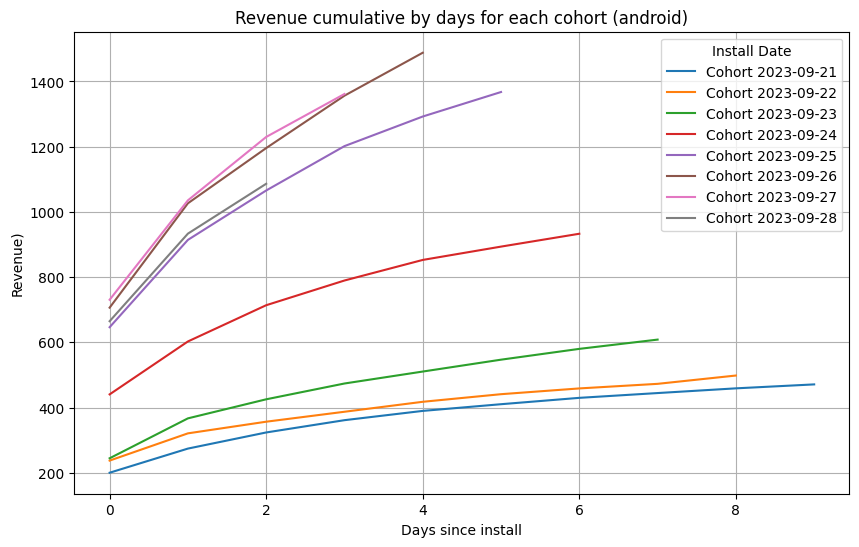

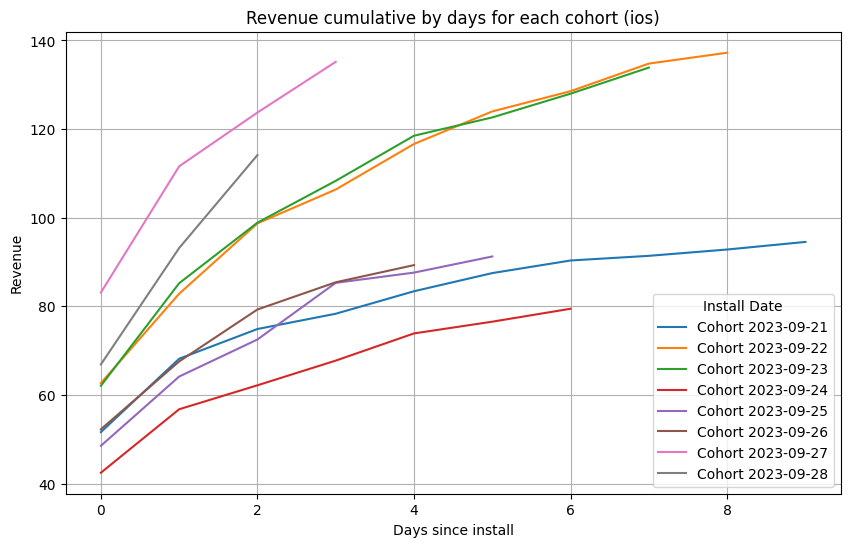

In [37]:
# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['cumulative_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue cumulative by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Revenue)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['cumulative_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue cumulative by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Revenue')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Рост кумулятивного дохода (Revenue growth rate)**

Эти таблицы представляют собой рост кумулятивного дохода по дням для каждой когорты пользователей, установивших приложение в разные дни. Значение на 0-й день — это 1.00, что означает 100% от первоначального дохода. Все последующие значения показывают, как увеличился кумулятивный доход относительно первого дня. Таблицы кумулятивного удержания дохода дают важную информацию о том, как нарастает доход (revenue) от пользователей с момента их установки приложения.

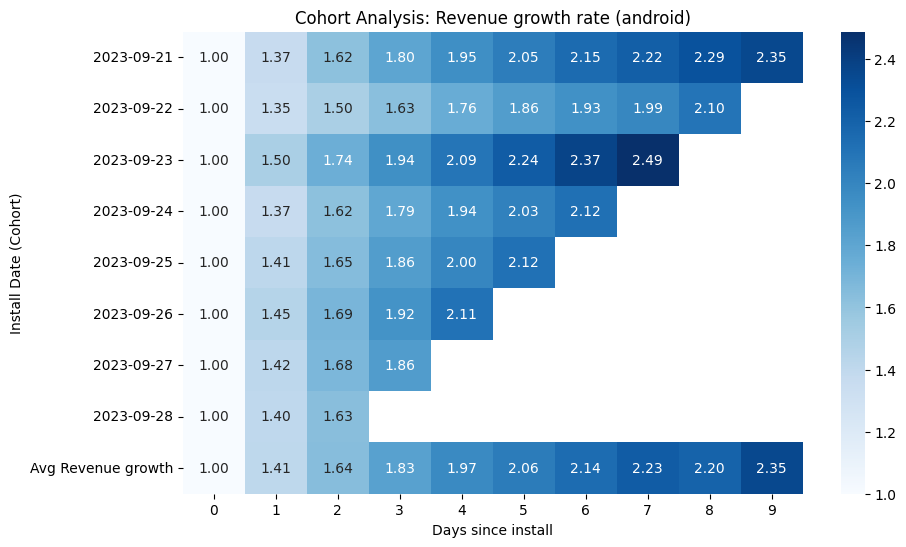

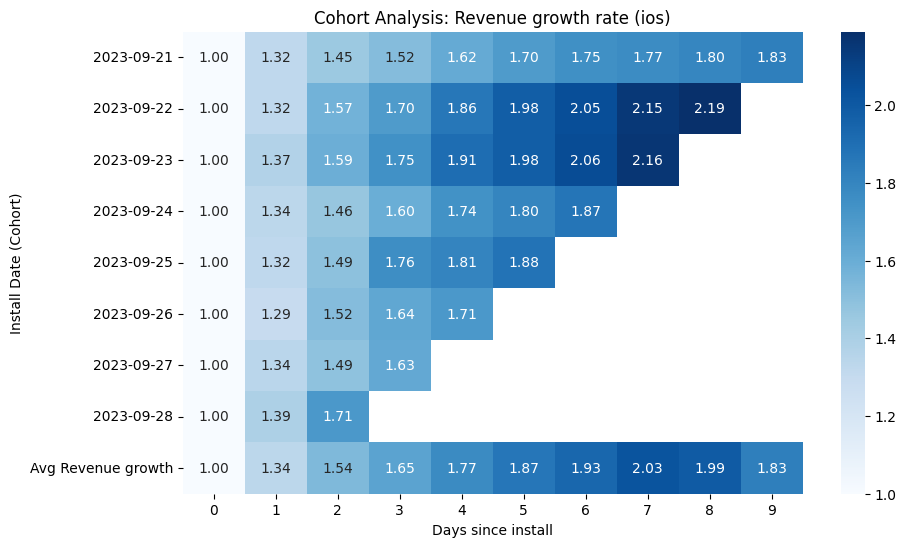

In [38]:
# Рассчитываем среднее значение revenue growth rate для каждого дня (days_since_install) для Android
mean_revenue_growth_android = daily_data_android.groupby('days_since_install')['revenue_growth'].mean()
revenue_table_android = daily_data_android.pivot(index='install_date', columns='days_since_install', values='revenue_growth')
revenue_table_android.loc['Avg Revenue growth'] = mean_revenue_growth_android

# Визуализация тепловой карты с добавлением строки среднего значения
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table_android, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue growth rate (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

# Аналогичный расчет для iOS
mean_revenue_growth_ios = daily_data_ios.groupby('days_since_install')['revenue_growth'].mean()
revenue_table_ios = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='revenue_growth')
revenue_table_ios.loc['Avg Revenue growth'] = mean_revenue_growth_ios

plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table_ios, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue growth rate (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

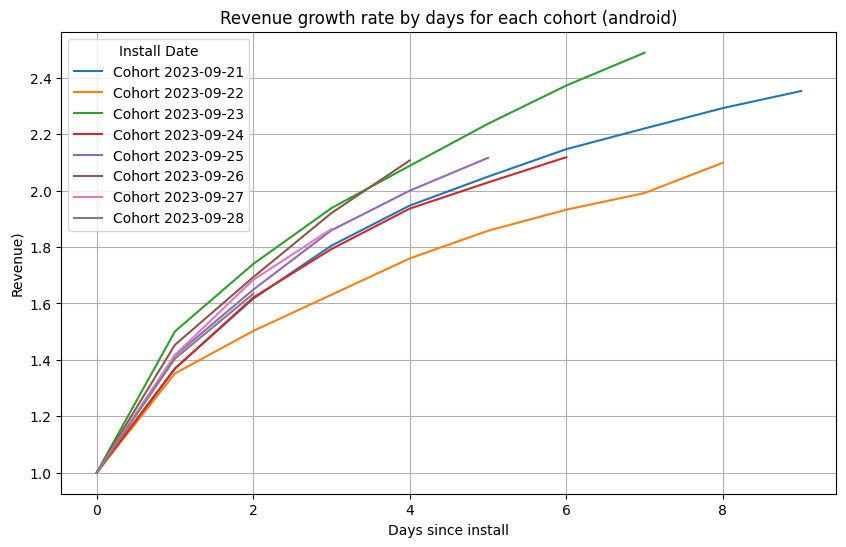

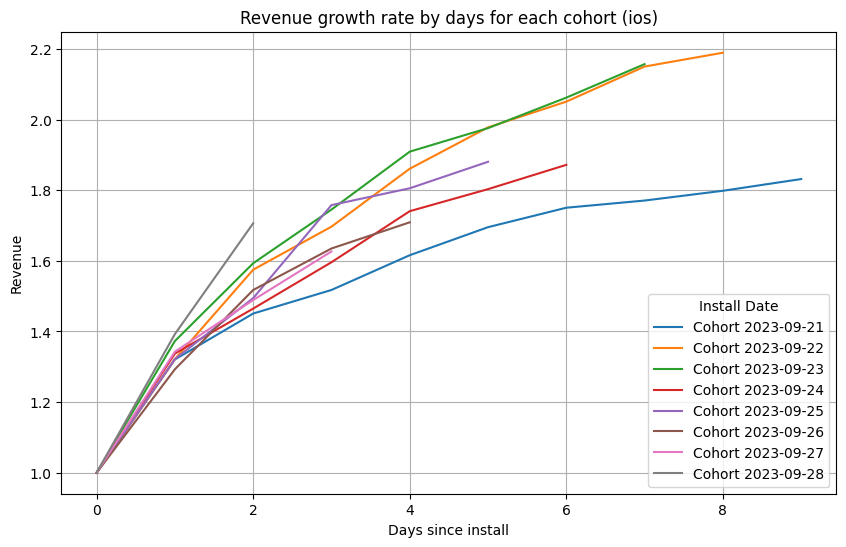

In [39]:
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['revenue_growth'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue growth rate by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Revenue)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['revenue_growth'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue growth rate by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Revenue')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

In [ ]:
# Фактические средние значения revenue growth для Android на 0, 1, 3 дни
revenue_growth_d0_android = mean_revenue_growth_android.loc[0]
revenue_growth_d1_android= mean_revenue_growth_android.loc[1]
revenue_growth_d3_android = mean_revenue_growth_android.loc[3]

# Фактические средние значения revenue growth для iOS на 0, 1, 3 дни
revenue_growth_d0_ios = mean_revenue_growth_ios.loc[0]
revenue_growth_d1_ios= mean_revenue_growth_ios.loc[1]
revenue_growth_d3_ios = mean_revenue_growth_ios.loc[3]


# Создадим таблицу
data = {
    "Day": [0, 1, 3],
    "Android Actual growth": [revenue_growth_d0_android, revenue_growth_d1_android, revenue_growth_d3_android],
    "iOS Actual growth": [revenue_growth_d0_ios, revenue_growth_d1_ios, revenue_growth_d3_ios]
}

data['Android Increase to D30'] = predicted_revenue_growth_d30_android / data['Android Actual growth']
data['iOS Increase to D30'] = predicted_revenue_growth_d30_ios / data['iOS Actual growth']

df_summary = pd.DataFrame(data)
print(df_summary)

   Day  Android Actual growth  iOS Actual growth  Android Increase to D30  \
0    0               1.000000           1.000000                 2.626260   
1    1               1.409826           1.337936                 1.862826   
2    3               1.829785           1.653627                 1.435283   

   iOS Increase to D30  
0             2.265479  
1             1.693264  
2             1.370006  


Увеличение ревеню нулевого дня (день установки игры), первого и третьего дня к 30-му дню:

На основании оценки модели:


RMSE для Android (0.10) и iOS (0.10): Очень низкие значения RMSE говорят о том,
что модель хорошо предсказывает фактические данные с минимальными отклонениями.


R² для Android (0.94) и iOS (0.91): Высокие значения R² указывают на то, что модель объясняет практически всю вариацию данных, особенно для Android.
Модель для Android предсказывает 30-дневное удержание выручки на уровне 2.63, а для iOS — 2.27.
Линии хорошо следуют за фактическими данными, особенно для Android, где кривая более точно соответствует точкам на графике.

#### **Прогноз удержания пользователей на 30 день**

На основании представленных данных и графиков я выбрала модель «forgetting curve» (https://app2top.ru/marketing/modeliruem-uderzhanie-pol-zovatelej-v-poiskah-optimal-noj-formuly-99392.html) для описания поведения пользователей, поскольку она наиболее точно отражает характер изменений уровня удержания по когортам на протяжении времени.

1. Резкое снижение удержания в первые дни: Как видно на графиках для платформ Android и iOS, в первые дни после установки приложения уровень удержания пользователей значительно падает. Это согласуется с моделью кривой забывания, которая описывает быструю потерю интереса или информации сразу после первого взаимодействия, если не предприняты специальные меры для их сохранения.

2. Замедление снижения удержания: После первых нескольких дней падение удержания замедляется, что также характерно для кривой забывания. Модель предполагает, что после быстрого начального спада активность или интерес пользователей стабилизируются на более низком уровне, что подтверждается данными.

3. Схожие паттерны среди когорт: Независимо от даты установки, все когорты демонстрируют один и тот же паттерн: резкий спад активности в начале и стабилизация через несколько дней. Это свидетельствует о том, что пользователи проходят через одинаковый процесс потери интереса к приложению, что позволяет обоснованно применить модель забывания.


Исходя из этих факторов, модель «forgetting curve» наиболее адекватно объясняет наблюдаемые тренды в данных и помогает лучше понять поведение пользователей на протяжении первых дней после установки приложения.

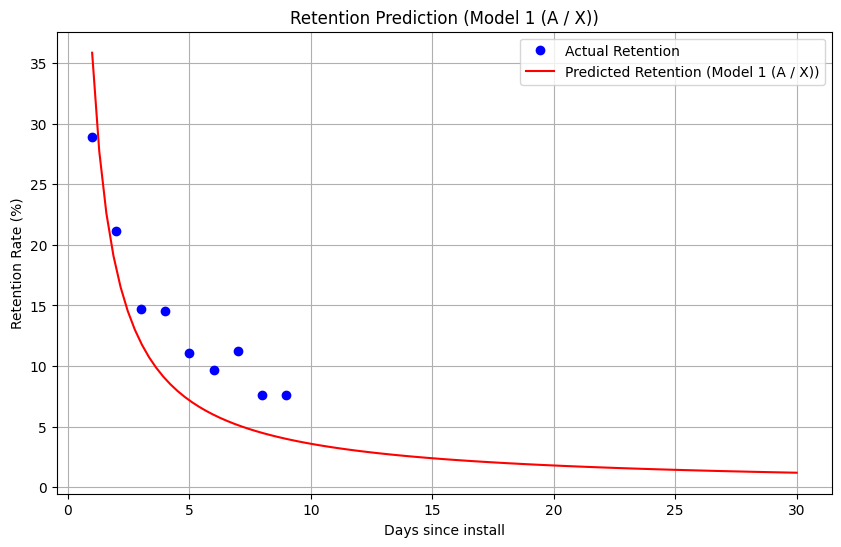

Model 1 (A / X):
Parameters: [35.85914382]
RMSE: 4.55
R^2: 0.52



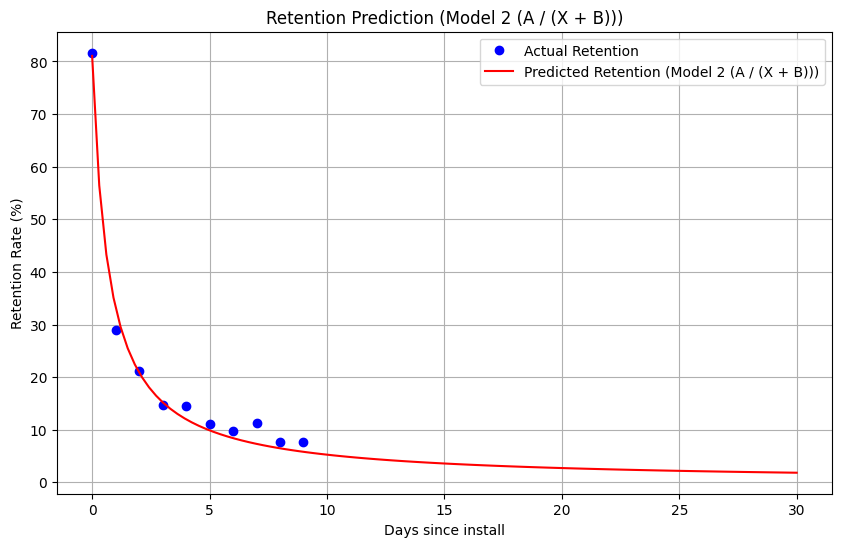

Model 2 (A / (X + B)):
Parameters: [56.31704085  0.69473817]
RMSE: 2.21
R^2: 0.99



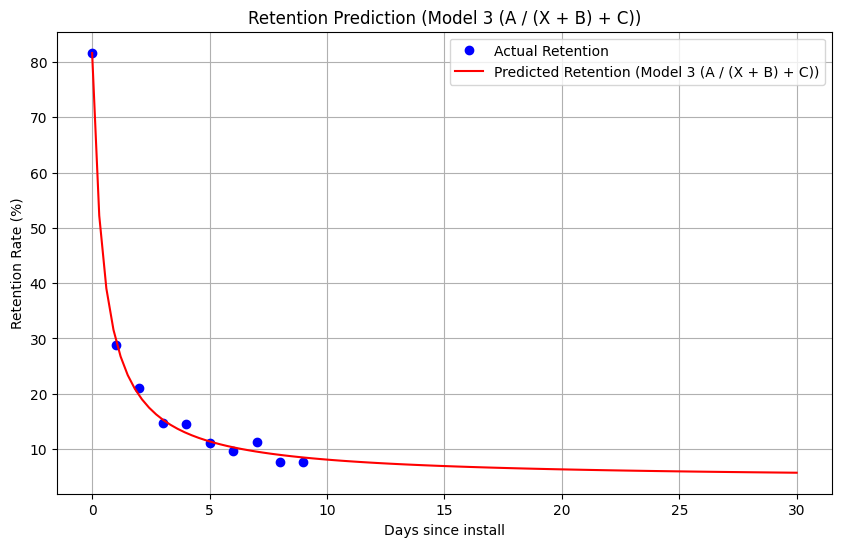

Model 3 (A / (X + B) + C):
Parameters: [37.93455348  0.49182098  4.47615059]
RMSE: 1.09
R^2: 1.00

Optimal Model: Model 3 (A / (X + B) + C)
Parameters: [37.93455348  0.49182098  4.47615059]
RMSE: 1.09
R^2: 1.00


In [43]:
# Данные для первой когорты
cohort_first = daily_data_android[daily_data_android['install_date'] == date(2023, 9, 21)]
days_first_cohort = cohort_first['days_since_install'].values
retention_first_cohort = cohort_first['retention_rate'].values

# Удаляем нулевые значения для модели 1
days_first_cohort_no_zero = days_first_cohort[days_first_cohort > 0]
retention_first_cohort_no_zero = retention_first_cohort[days_first_cohort > 0]

# Определяем модели
def model_1(x, a):  # retention = A / X
    return a / x

def model_2(x, a, b):  # retention = A / (X + B)
    return a / (x + b)

def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

models = {
    "Model 1 (A / X)": (model_1, [80]),
    "Model 2 (A / (X + B))": (model_2, [80, 1]),
    "Model 3 (A / (X + B) + C)": (model_3, [80, 1, 7]),
}

# Результаты для всех моделей
results = []

for name, (model, initial_params) in models.items():
    try:
        if name == "Model 1 (A / X)":
            # Используем данные без нулей для Model 1
            popt, _ = curve_fit(model, days_first_cohort_no_zero, retention_first_cohort_no_zero, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort_no_zero, *popt)
            days_pred = np.linspace(1, 30, 100)  # Начинаем с 1 для Model 1
        else:
            # Используем полные данные для других моделей
            popt, _ = curve_fit(model, days_first_cohort, retention_first_cohort, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort, *popt)
            days_pred = np.linspace(0, 30, 100)  # Диапазон для предсказаний

        # Прогноз для будущих значений
        retention_pred = model(days_pred, *popt)

        # Оценка метрик
        rmse = np.sqrt(mean_squared_error(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train))
        r2 = r2_score(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train)

        # Сохранение результатов
        results.append((name, popt, rmse, r2))

        # Визуализация
        plt.figure(figsize=(10, 6))
        plt.plot(days_first_cohort if name != "Model 1 (A / X)" else days_first_cohort_no_zero,
                 retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero,
                 'o', label='Actual Retention', color='blue')
        plt.plot(days_pred, retention_pred, '-', label=f'Predicted Retention ({name})', color='red')
        plt.xlabel('Days since install')
        plt.ylabel('Retention Rate (%)')
        plt.title(f'Retention Prediction ({name})')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Вывод результатов
        print(f'{name}:')
        print(f'Parameters: {popt}')
        print(f'RMSE: {rmse:.2f}')
        print(f'R^2: {r2:.2f}\n')

    except RuntimeError as e:
        print(f'{name} could not be fitted: {e}')
    except ValueError as e:
        print(f'Error with {name}: {e}')

# Оптимальная модель
optimal_model = min(results, key=lambda x: x[2])  # Сравнение по RMSE
print(f'Optimal Model: {optimal_model[0]}')
print(f'Parameters: {optimal_model[1]}')
print(f'RMSE: {optimal_model[2]:.2f}')
print(f'R^2: {optimal_model[3]:.2f}')


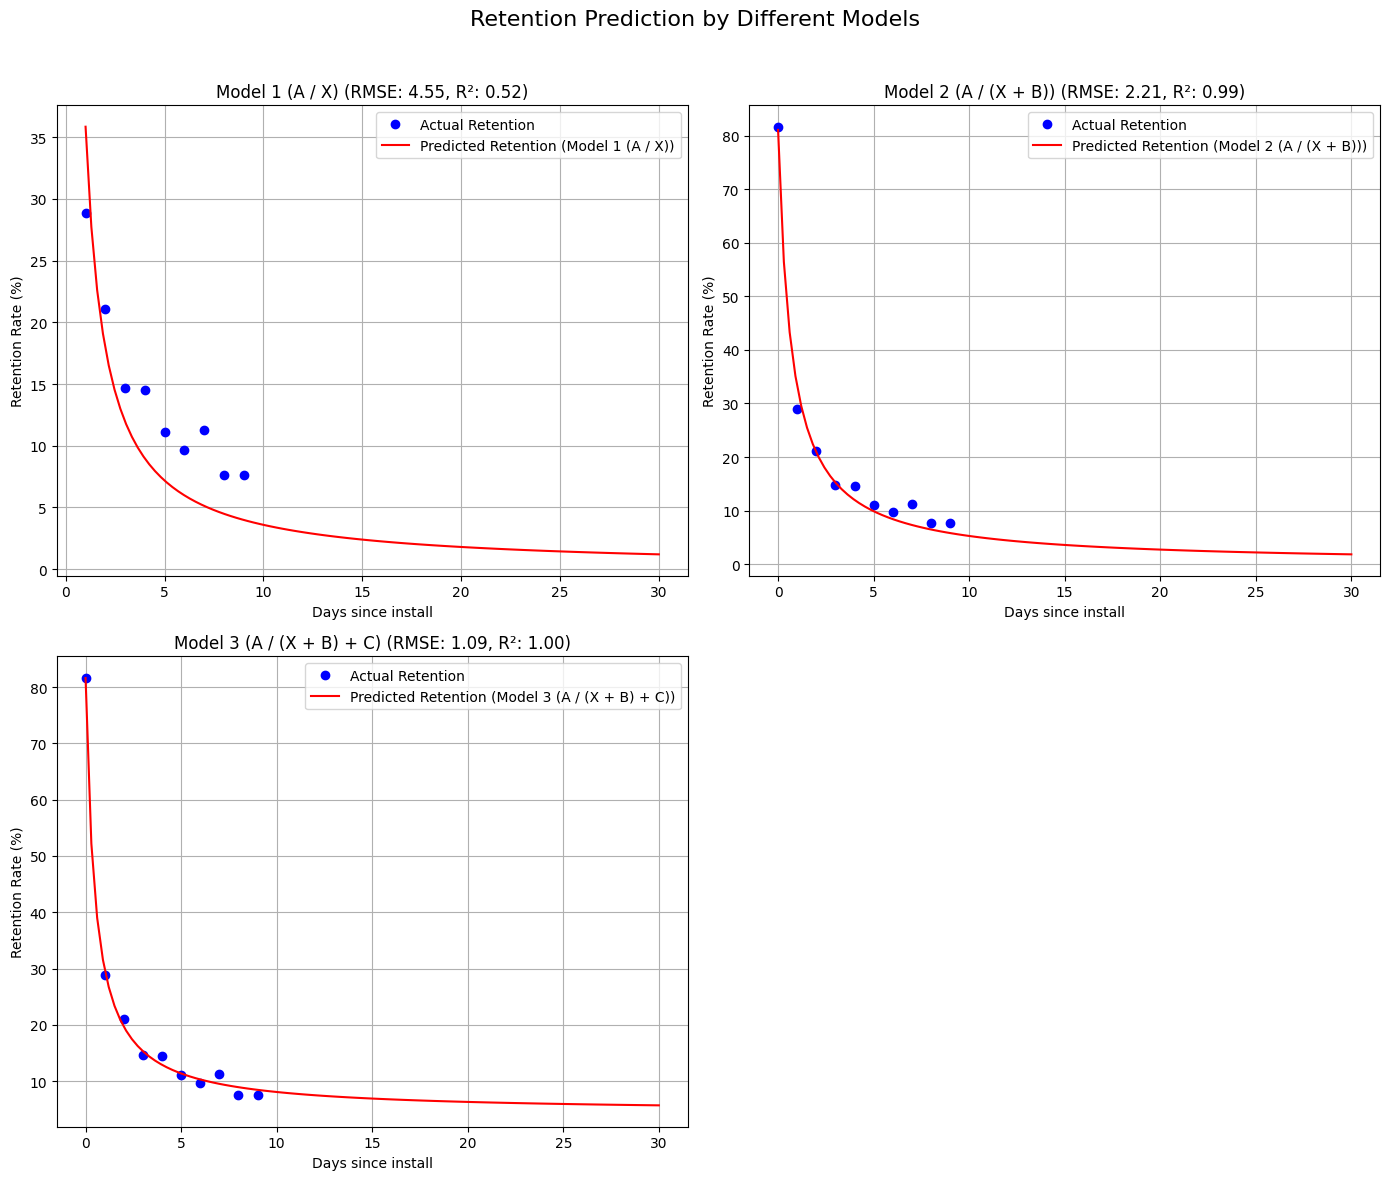

In [44]:
# Подготовка данных для 2x2 визуализации
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Названия графиков для каждой модели
titles = [
    "Model 1 (A / X)",
    "Model 2 (A / (X + B))",
    "Model 3 (A / (X + B) + C)"
]

# Проходим по всем моделям и визуализируем
for idx, (name, (model, initial_params)) in enumerate(models.items()):
    if idx >= len(titles):  # Пропускаем лишние модели
        break
    try:
        # Обработка данных для Model 1 (без нулей)
        if name == "Model 1 (A / X)":
            popt, _ = curve_fit(model, days_first_cohort_no_zero, retention_first_cohort_no_zero, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort_no_zero, *popt)
            days_pred = np.linspace(1, 30, 100)
            retention_pred = model(days_pred, *popt)
        else:
            popt, _ = curve_fit(model, days_first_cohort, retention_first_cohort, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort, *popt)
            days_pred = np.linspace(0, 30, 100)
            retention_pred = model(days_pred, *popt)

        # Оценка метрик
        rmse = np.sqrt(mean_squared_error(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train))
        r2 = r2_score(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train)

        # Визуализация
        ax = axes[idx]
        ax.plot(days_first_cohort if name != "Model 1 (A / X)" else days_first_cohort_no_zero,
                retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero,
                'o', label='Actual Retention', color='blue')
        ax.plot(days_pred, retention_pred, '-', label=f'Predicted Retention ({name})', color='red')
        ax.set_title(f"{titles[idx]} (RMSE: {rmse:.2f}, R²: {r2:.2f})")
        ax.set_xlabel('Days since install')
        ax.set_ylabel('Retention Rate (%)')
        ax.legend()
        ax.grid(True)

    except RuntimeError as e:
        # Если модель не подгоняется, оставляем пустой график с информацией об ошибке
        ax = axes[idx]
        ax.text(0.5, 0.5, 'Data Error', ha='center', va='center', fontsize=12, color='red')
        ax.set_title(f"{titles[idx]}: Data Error")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)

# Оставляем последний график пустым
if len(models) < 4:
    axes[3].axis('off')

# Настройка общего оформления
plt.suptitle("Retention Prediction by Different Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Чтобы заголовок не перекрывал графики
plt.show()


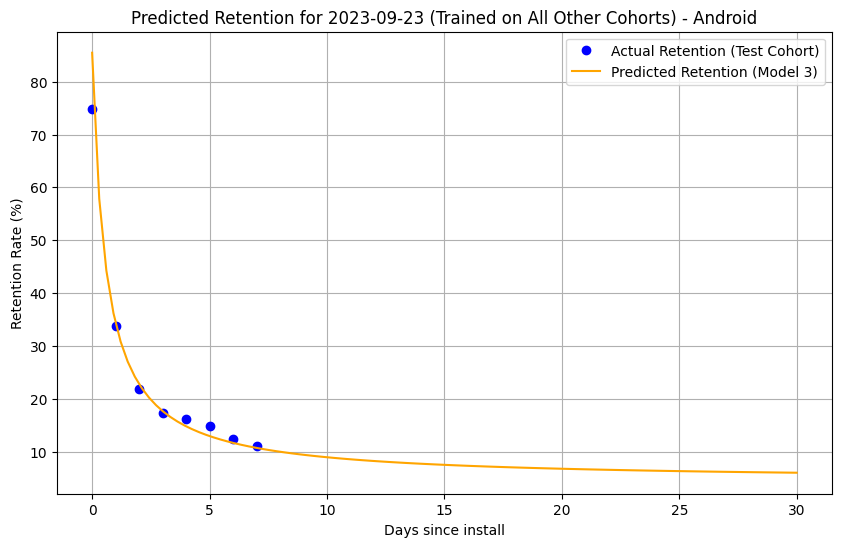

Predicted Retention on Day 30: 6.03%
RMSE: 3.89
R^2: 0.96
Model Parameters: [47.37687019  0.58499469  4.482928  ]


In [71]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Объединяем данные всех когорт
all_cohorts_android = daily_data_android.copy()  # Создаём копию данных

# Преобразуем `install_date` в числовой формат (порядковый номер даты)
all_cohorts_android['install_date_numeric'] = all_cohorts_android['install_date'].map(lambda x: x.toordinal())

# Выбираем тестируемую когорту
test_cohort_date = date(2023, 9, 23)
test_cohort_android = all_cohorts_android[all_cohorts_android['install_date'] == test_cohort_date]

# Выбираем обучающую выборку (все, кроме тестируемой когорты)
train_cohorts_android = all_cohorts_android[all_cohorts_android['install_date'] != test_cohort_date]

# Разделяем переменные для обучения
days_train = train_cohorts_android['days_since_install'].values
retention_train = train_cohorts_android['retention_rate'].values

# Разделяем переменные для тестирования
days_test = test_cohort_android['days_since_install'].values
retention_test = test_cohort_android['retention_rate'].values

# Определяем модель 3 (без install_date, но обучаем отдельно)
def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

# Обучение модели на обучающих данных (все когорты, кроме тестируемой)
p0 = [50, 1, 5]  # Начальные параметры
popt, _ = curve_fit(model_3, days_train, retention_train, p0=p0, maxfev=5000)

# Прогноз для тестируемой когорты
days_pred = np.linspace(0, 30, 100)
retention_pred = model_3(days_pred, *popt)

# Прогноз для тестируемой когорты (на её же днях)
retention_pred_test_cohort = model_3(days_test, *popt)

# Оценка метрик
rmse = np.sqrt(mean_squared_error(retention_test, retention_pred_test_cohort))
r2 = r2_score(retention_test, retention_pred_test_cohort)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(days_test, retention_test, 'o', label='Actual Retention (Test Cohort)', color='blue')
plt.plot(days_pred, retention_pred, '-', label='Predicted Retention (Model 3)', color='orange')
plt.xlabel('Days since install')
plt.ylabel('Retention Rate (%)')
plt.title(f'Predicted Retention for {test_cohort_date} (Trained on All Other Cohorts) - Android')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f'Predicted Retention on Day 30: {model_3(30, *popt):.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Model Parameters: {popt}')



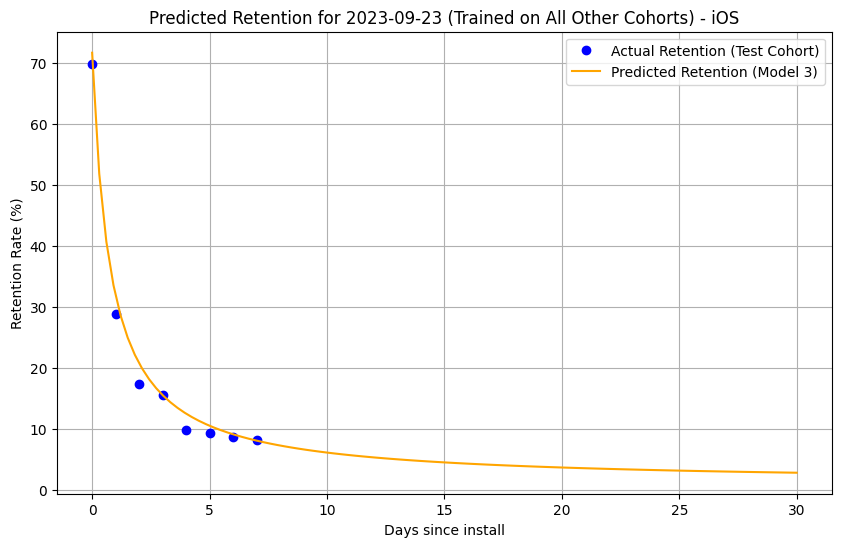

Predicted Retention on Day 30: 2.79%
RMSE: 2.03
R^2: 0.99
Model Parameters: [54.85437668  0.77541198  1.00305566]


In [70]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Объединяем данные всех когорт
all_cohorts_ios = daily_data_ios  # Данные всех когорт

# Выбираем тестируемую когорту (например, 2023-09-21)
test_cohort_date = date(2023, 9, 23)
test_cohort_ios = all_cohorts_ios[all_cohorts_ios['install_date'] == test_cohort_date]

# Выбираем обучающую выборку (все, кроме тестируемой когорты)
train_cohorts_ios = all_cohorts_ios[all_cohorts_ios['install_date'] != test_cohort_date]

# Разделяем переменные для обучения
days_train = train_cohorts_ios['days_since_install'].values
retention_train = train_cohorts_ios['retention_rate'].values

# Разделяем переменные для тестирования
days_test = test_cohort_ios['days_since_install'].values
retention_test = test_cohort_ios['retention_rate'].values

# Определяем модель
def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

# Обучение модели на обучающих данных (все когорты, кроме тестируемой)
p0 = [50, 1, 5]  # Начальные параметры
popt, _ = curve_fit(model_3, days_train, retention_train, p0=p0, maxfev=5000)

# Прогноз для тестируемой когорты
days_pred = np.linspace(0, 30, 100)  # Дни для прогноза
retention_pred = model_3(days_pred, *popt)

# Прогноз для обучающих данных (чтобы сравнить)
retention_pred_test_cohort = model_3(days_test, *popt)

# Оценка метрик
rmse = np.sqrt(mean_squared_error(retention_test, retention_pred_test_cohort))
r2 = r2_score(retention_test, retention_pred_test_cohort)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(days_test, retention_test, 'o', label='Actual Retention (Test Cohort)', color='blue')
plt.plot(days_pred, retention_pred, '-', label='Predicted Retention (Model 3)', color='orange')
plt.xlabel('Days since install')
plt.ylabel('Retention Rate (%)')
plt.title(f'Predicted Retention for {test_cohort_date} (Trained on All Other Cohorts) - iOS')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f'Predicted Retention on Day 30: {model_3(30, *popt):.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Model Parameters: {popt}')


### Проверка гипотез

1. Влияние размера когорт на выручку

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Корреляция размера когорт с выручкой
size_revenue_corr, size_revenue_p = pearsonr(daily_data['cohort_size'], daily_data['event_revenue'])

# Корреляция Retention Rate с выручкой
retention_revenue_corr, retention_revenue_p = pearsonr(daily_data['retention_rate'], daily_data['event_revenue'])

print(f"Корреляция размера когорты с выручкой: {size_revenue_corr:.2f}, p-value: {size_revenue_p:.4f}")
print(f"Корреляция Retention Rate с выручкой: {retention_revenue_corr:.2f}, p-value: {retention_revenue_p:.4f}")

Корреляция размера когорты с выручкой: 0.69, p-value: 0.0000
Корреляция Retention Rate с выручкой: 0.68, p-value: 0.0000


In [ ]:
import statsmodels.api as sm

# Подготовка данных для регрессии
X = daily_data[['cohort_size', 'retention_rate', 'ARPU']]
X = sm.add_constant(X)  # Добавляем константу для регрессии
y = daily_data['revenue_growth']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         revenue_growth   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     99.95
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           5.60e-30
Time:                        20:03:49   Log-Likelihood:                 24.591
No. Observations:                 104   AIC:                            -41.18
Df Residuals:                     100   BIC:                            -30.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9429      0.072     27.

In [ ]:
# Подготовка данных для регрессии
X = daily_data[['cohort_size', 'retention_rate']]
X = sm.add_constant(X)  # Добавляем константу для регрессии
y = daily_data['event_revenue']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          event_revenue   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           2.62e-33
Time:                        20:06:02   Log-Likelihood:                -588.13
No. Observations:                 104   AIC:                             1182.
Df Residuals:                     101   BIC:                             1190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -104.4780     12.242     -8.

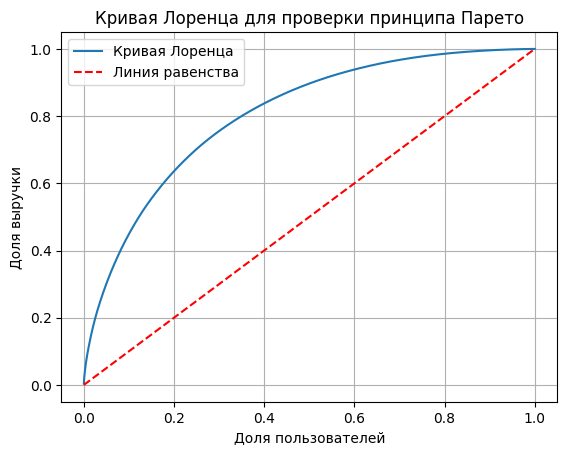

Топ-2804 пользователей генерируют 80% выручки.


In [ ]:
# 2. Принцип Парето (80/20)
# Сортируем пользователей по выручке
user_revenue = ad_revenue.groupby('user_id')['event_revenue'].sum().sort_values(ascending=False)
total_revenue = user_revenue.sum()
cumulative_revenue = user_revenue.cumsum()

# Вычисляем процент пользователей и долю выручки
user_percentage = np.arange(1, len(user_revenue) + 1) / len(user_revenue)
revenue_percentage = cumulative_revenue / total_revenue

# Визуализация кривой Лоренца
plt.plot(user_percentage, revenue_percentage, label='Кривая Лоренца')
plt.plot([0, 1], [0, 1], 'r--', label='Линия равенства')
plt.title('Кривая Лоренца для проверки принципа Парето')
plt.xlabel('Доля пользователей')
plt.ylabel('Доля выручки')
plt.legend()
plt.grid()
plt.show()

# Проверка 80/20
pareto_80 = cumulative_revenue[cumulative_revenue <= 0.8 * total_revenue].count()
print(f"Топ-{pareto_80} пользователей генерируют 80% выручки.")

In [ ]:
from scipy.stats import chi2_contingency

# Сортируем пользователей по выручке
user_revenue = ad_revenue.groupby('user_id')['event_revenue'].sum().sort_values(ascending=False)
total_users = len(user_revenue)
top_20_percent_users = int(0.2 * total_users)

# Разделяем пользователей на две группы: топ-20% и остальные
top_20_revenue = user_revenue[:top_20_percent_users].sum()
remaining_revenue = user_revenue[top_20_percent_users:].sum()

# Проверяем, составляет ли топ-20% >= 80% выручки
expected_top_20_revenue = 0.8 * (top_20_revenue + remaining_revenue)
expected_remaining_revenue = 0.2 * (top_20_revenue + remaining_revenue)

# Создаем таблицу наблюдаемых и ожидаемых значений
observed = [top_20_revenue, remaining_revenue]
expected = [expected_top_20_revenue, expected_remaining_revenue]

# Применяем критерий хи-квадрат
chi2_stat, p_value, _, _ = chi2_contingency([observed, expected])

# Результаты
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"P-value: {p_value}")

# Вывод
if p_value < 0.05:
    print("H₀ отклоняется: топ-20% пользователей действительно генерируют 80% выручки.")
else:
    print("H₀ принимается: топ-20% пользователей не генерируют 80% выручки.")

Хи-квадрат статистика: 576.3425084879175
P-value: 2.3424152109237997e-127
H₀ отклоняется: топ-20% пользователей действительно генерируют 80% выручки.


In [ ]:
# Группировка данных по платформам и пользователям
platform_user_revenue = ad_revenue.groupby(['platform', 'user_id'])['event_revenue'].sum()

# Функция для расчета доли выручки для топ-20% пользователей
def calculate_top_20_revenue(data):
    data = data.sort_values(ascending=False)
    total_users = len(data)
    top_20_users = int(0.2 * total_users)
    top_20_revenue = data[:top_20_users].sum()
    total_revenue = data.sum()
    revenue_share_top_20 = (top_20_revenue / total_revenue) * 100
    return revenue_share_top_20

# Применяем функцию по каждой платформе
platform_revenue_shares = platform_user_revenue.groupby('platform').apply(calculate_top_20_revenue)

# Вывод результатов
for platform, revenue_share in platform_revenue_shares.items():
    print(f"Топ-20% пользователей на {platform} генерируют {revenue_share:.2f}% выручки.")

Топ-20% пользователей на android генерируют 64.43% выручки.
Топ-20% пользователей на ios генерируют 55.89% выручки.


In [78]:
from scipy.stats import f_oneway, kruskal

# Группируем данные по `days_since_install`
grouped_data = daily_data_android.groupby('days_since_install')

results = []

for day, group in grouped_data:
    # Разделяем данные по когортам
    cohorts = [g['retention_rate'].values for _, g in group.groupby('install_date')]

    # Пропускаем день, если есть только одна когорта
    if len(cohorts) < 2:
        continue

    # Проверяем нормальность для каждой когорты
    normal = all(len(c) > 3 for c in cohorts)  # Шапиро-Уилк требует >3 значений

    if normal:
        # ANOVA тест
        stat, p_value = f_oneway(*cohorts)
        test = "ANOVA"
    else:
        # Критерий Крускала-Уоллиса
        stat, p_value = kruskal(*cohorts)
        test = "Kruskal-Wallis"

    results.append({"days_since_install": day, "stat": stat, "p_value": p_value, "test": test})

In [81]:
# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)

# Добавляем колонку для интерпретации результатов
results_df['significant'] = results_df['p_value'] < 0.05

# Выводим результаты
print(results_df.head(10))

   days_since_install  stat   p_value            test  significant
0                   0   7.0  0.428880  Kruskal-Wallis        False
1                   1   7.0  0.428880  Kruskal-Wallis        False
2                   2   7.0  0.428880  Kruskal-Wallis        False
3                   3   6.0  0.423190  Kruskal-Wallis        False
4                   4   5.0  0.415880  Kruskal-Wallis        False
5                   5   4.0  0.406006  Kruskal-Wallis        False
6                   6   3.0  0.391625  Kruskal-Wallis        False
7                   7   2.0  0.367879  Kruskal-Wallis        False
8                   8   1.0  0.317311  Kruskal-Wallis        False


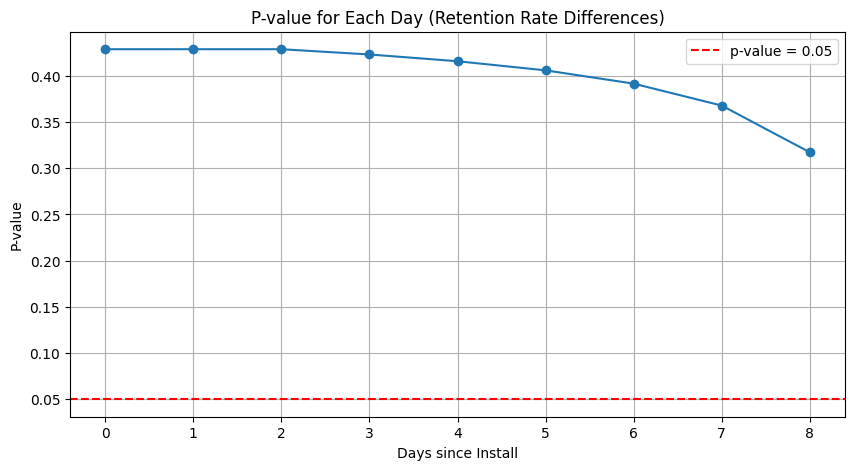

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['days_since_install'], results_df['p_value'], marker='o')
plt.axhline(y=0.05, color='red', linestyle='--', label='p-value = 0.05')
plt.title("P-value for Each Day (Retention Rate Differences)")
plt.xlabel("Days since Install")
plt.ylabel("P-value")
plt.legend()
plt.grid(True)
plt.show()